In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
x = np.arange(20)

In [3]:
x.shape

(20,)

In [4]:
X = np.vstack((np.ones(len(x)),x, x**2, x**3, x**4, x**5)).T

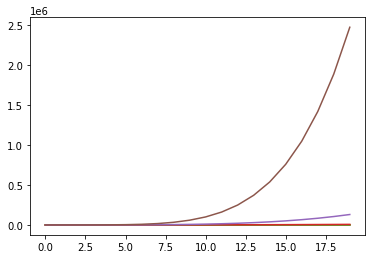

In [5]:
plt.plot(X)

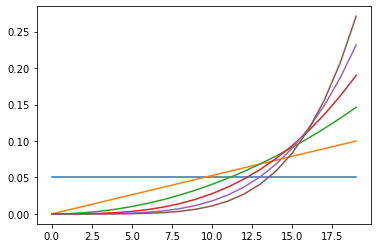

In [7]:
plt.plot(X / X.sum(axis=0))

In [8]:
val, vec = np.linalg.eig(np.dot(X.T, X))

[]

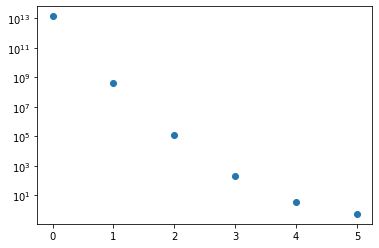

In [9]:
plt.plot(val,'o')
plt.semilogy()

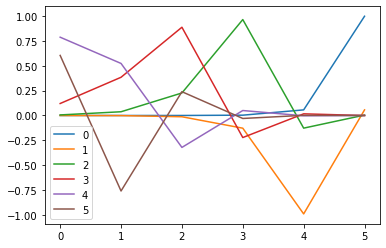

In [10]:
plt.plot(vec)
plt.legend(np.arange(6))

In [11]:
# Construct a function - a sine wave + noise at 15% the depth of the sine wave
y = np.sin(2*np.pi * x / 20)  + np.random.normal(size=x.shape)*.3
ytrue = np.sin(2*np.pi * x / 20) 


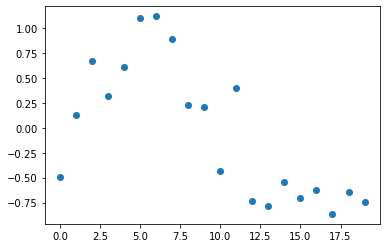

In [12]:
plt.plot(x,y, 'o')

In [13]:
import numpy.linalg
w = np.linalg.lstsq(X,y)

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_31443/1998329285.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(X,y)


In [14]:
w[0]

array([-4.25460691e-01,  4.81945901e-01, -1.66563071e-02, -8.81750129e-03,
        7.96149691e-04, -1.88841813e-05])

<BarContainer object of 6 artists>

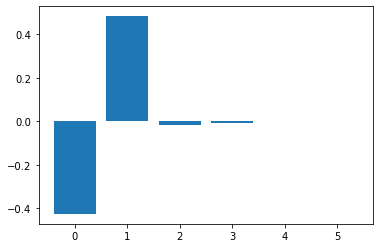

In [22]:
plt.bar(np.arange(len(w[0])), w[0])

In [15]:
yfit = w[0][0] +w[0][1]*x +w[0][2] * x**2 + w[0][3]*x **3  +w[0][4]*x **4 +w[0][5]*x **5

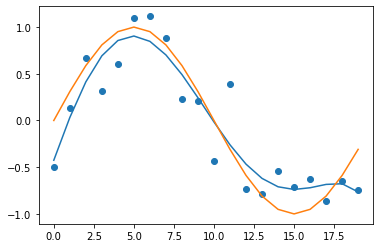

In [17]:
plt.scatter(x,y)
plt.plot(x, yfit)
plt.plot(x, ytrue)

In [ ]:
# Ready to declare victory? 

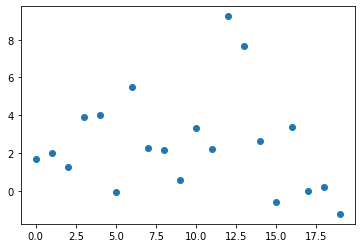

In [30]:
#  Hmm.  What if our function has only terms of x & x^2 ? 
y2  = x -0.05*x**2 + np.random.normal(size=x.shape)*2
y2perfect = x - 0.05*x**2 
plt.scatter(x, y2)

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_31443/2804994055.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w2 = np.linalg.lstsq(X,y2)


array([-1.70680972e+00,  3.33186646e+00, -6.34993501e-01,  6.03854505e-02,
       -2.81314044e-03,  4.95108903e-05])

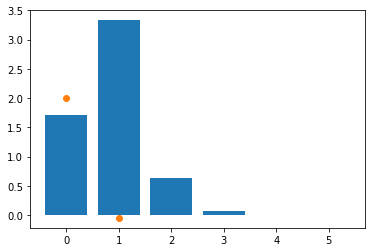

In [26]:
w2 = np.linalg.lstsq(X,y2)
plt.bar(np.arange(len(w2[0])), np.abs(w2[0]))
plt.plot([[1, 2], [1, -.05]], 'o')
#plt.semilogy()
w2[0]

In [27]:
w2[0]

array([-1.70680972e+00,  3.33186646e+00, -6.34993501e-01,  6.03854505e-02,
       -2.81314044e-03,  4.95108903e-05])

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

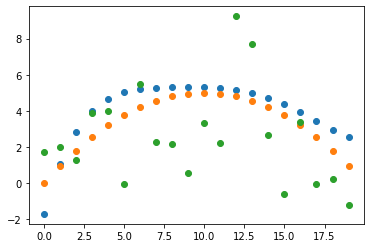

In [35]:
opt= w2[0]
plt.scatter(x,  np.dot(X, opt), label = "Polynomial - 5th order - fit" )
plt.scatter(x,   y2perfect, label="x-0.05x^2")
plt.scatter(x, y2, label="Noisy data")
plt.label()

In [36]:
np.dot(X, opt)

array([-1.70680972,  1.04768505,  2.85660689,  3.98842207,  4.65596412,
        5.0223751 ,  5.20704696,  5.29156278,  5.32563814,  5.33306236,
        5.31763988,  5.26913152,  5.16919578,  4.9973302 ,  4.7368126 ,
        4.38064242,  3.93748205,  3.4375981 ,  2.93880269,  2.53239484])

In [37]:
opt2 = scipy.optimize.minimize(linear_SSE, opt.x)

NameError: name 'linear_SSE' is not defined

In [ ]:
opt.x.shape, X.shape


In [ ]:
opt.x, w2

In [ ]:
galton = pd.read_csv("galton.csv")

In [ ]:
galton.head()

In [ ]:
galton["indicator"]= galton["gender"] == "male"

In [ ]:
plt.scatter(galton.childHeight, galton.indicator)

In [ ]:
lin = scipy.stats.linregress(galton.childHeight, galton.indicator)

In [ ]:
lin

In [ ]:
height = np.arange(55, 80)
linreg = lin.intercept + lin.slope * height 

Decision boundary is at 
$$ b_0 + b_1 x_{crit} = 0.5 $$
so 
$$ x_{crit} = (0.5 - b_0) / b_1 $$
What are we expecting?  
Women have a mean around 64 (162 cm)
Men a mean around 69 (175 cm)
so this better be in the middle around 66 or 67!

In [ ]:
xcrit = (0.5 - lin.intercept ) / lin.slope
xcrit

In [ ]:
plt.scatter(galton.childHeight, galton.indicator)
plt.plot(height, linreg)
plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.savefig("Linear-galton.png")

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression


In [ ]:
# The magic command is LogisitcRegression.fit(x,y)
clf = LogisticRegression(random_state=0).fit(galton.childHeight.values.reshape([-1,1]), galton.indicator.values.reshape([-1,1]))

In [ ]:
# And the return data structure has attributes 
# .coef_ and .intercept_.
# Note you have to access them by clf.coef_[0]
clf.coef_

In [ ]:
clf.intercept_

In [ ]:
logistic = 1 / (1+np.exp( - clf.coef_[0] * height - clf.intercept_[0]))

In [ ]:
plt.scatter(galton.childHeight, galton.indicator)
plt.plot(height, linreg, label="linear fit")
plt.plot(height, logistic, label="logistic fit")
plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Linear-galton2.png")

In [ ]:
logg =  1 / (1+np.exp( - clf.coef_[0] * galton.childHeight.values - clf.intercept_[0]))
line = lin.intercept + lin.slope * galton.childHeight 
losslog = (galton.indicator ) * np.log(logg )+ (1-galton.indicator)*np.log(1-logg)
losslin = (line - galton.indicator)**2


In [ ]:
plt.scatter(galton.childHeight, losslin, c=losslin, cmap="turbo")

In [ ]:
plt.scatter(galton.childHeight, -losslog, c=-losslog, cmap="turbo")

In [ ]:
plt.scatter(galton.childHeight, galton.indicator)
plt.scatter(galton.childHeight, galton.indicator, c=losslin, cmap="turbo")
#plt.scatter(galton.childHeight, losslog, c=losslin, cmap="turbo")
plt.plot(height, linreg, label="linear fit")

plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Linear-galton2c.png", bbox_inches="tight", dpi=300)

In [ ]:
plt.scatter(galton.childHeight, galton.indicator, c=-losslog, cmap="turbo")
plt.scatter(galton.childHeight, galton.indicator, c=-losslog, cmap="turbo")
plt.plot(height, logistic, label="logistic fit")

plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Logistic-galton2c.png", bbox_inches="tight", dpi=300)